### Introduction to Sentiment and Text Analysis Tools

**VADER**, **TextBlob**, **LDA**, **Afinn**, and **Summa** are powerful tools used for analyzing and summarizing text data:

- **VADER**: A lexicon-based tool designed for sentiment analysis, particularly effective for social media and informal text, returning a compound sentiment score.
- **TextBlob**: A simple library offering sentiment analysis through polarity and subjectivity scores, useful for text classification and NLP tasks.
- **LDA (Latent Dirichlet Allocation)**: A topic modeling technique that identifies hidden themes in a collection of documents.
- **Afinn**: A sentiment analysis tool that scores text based on the sentiment of individual words, returning an overall sentiment score.
- **Summa**: A tool for extractive summarization, selecting key sentences from a document using the TextRank algorithm.

These methods are widely used for sentiment analysis, topic modeling, and text summarization to derive insights from textual data.


In [2]:
import pandas as pd
import re
import nltk
from afinn import Afinn
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lovis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lovis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lovis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lovis\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lovis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Initialize stemmer and lemmatizer
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    # Apply stemming and then lemmatization
    words = [ps.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

In [4]:
df = pd.read_csv('bbc_news_articles_mechanicalsoup.csv')
df.head()

,title,url,content
0,Clothes brand gets 100 complaints a day that m...,https://www.bbc.com/news/articles/cx2xjd41g33o,The boss of online clothing brand Snag has tol...
1,NewsNews,https://www.bbc.com/news/politics,Many usually loyal Labour MPs had voiced stron...
2,Greenland's politicians unite against Trump,https://www.bbc.com/news/articles/c2ljrjeqzq4o,Greenland's leading political parties have iss...
3,It's not a competition! The collaborative vide...,https://www.bbc.com/news/articles/c2ljgp4v48no,"Think of video games, and you'll probably thin..."
4,NewsNews,https://www.bbc.com/news/bbcindepth,The president once derided attempts to develop...


In [5]:
df['cleaned_content'] = df['content'].apply(clean_text)
df.head(3)

,title,url,content,cleaned_content
0,Clothes brand gets 100 complaints a day that m...,https://www.bbc.com/news/articles/cx2xjd41g33o,The boss of online clothing brand Snag has tol...,bos onlin cloth brand snag told bbc get compla...
1,NewsNews,https://www.bbc.com/news/politics,Many usually loyal Labour MPs had voiced stron...,mani usual loyal labour mp voic strong opposit...
2,Greenland's politicians unite against Trump,https://www.bbc.com/news/articles/c2ljrjeqzq4o,Greenland's leading political parties have iss...,greenland lead polit parti issu joint statemen...


## VADER SentimentIntensityAnalyzer

In [7]:
# Initialize the VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Assuming df has a column 'cleaned_content'
df['vader_score'] = df['cleaned_content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize based on score
df['vader_category'] = df['vader_score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Display the first two rows
df.head(2)

,title,url,content,cleaned_content,vader_score,vader_category
0,Clothes brand gets 100 complaints a day that m...,https://www.bbc.com/news/articles/cx2xjd41g33o,The boss of online clothing brand Snag has tol...,bos onlin cloth brand snag told bbc get compla...,-0.9947,Negative
1,NewsNews,https://www.bbc.com/news/politics,Many usually loyal Labour MPs had voiced stron...,mani usual loyal labour mp voic strong opposit...,-0.7845,Negative


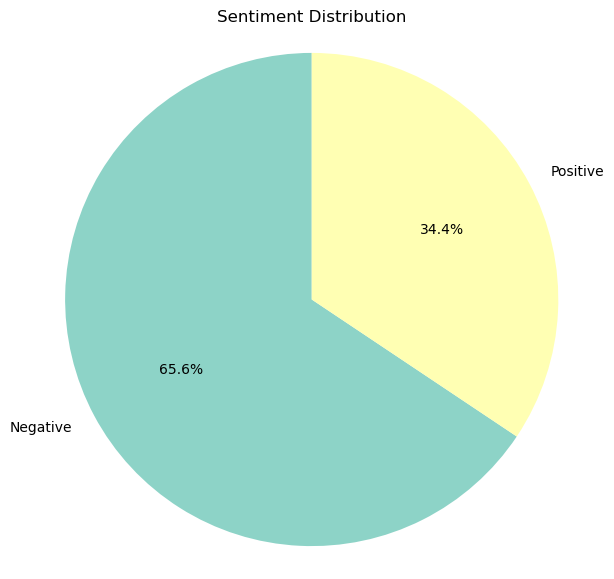

In [8]:
# Pie chart to visualize the distribution of sentiment categories
sentiment_counts = df['vader_category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(sentiment_counts)))
plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

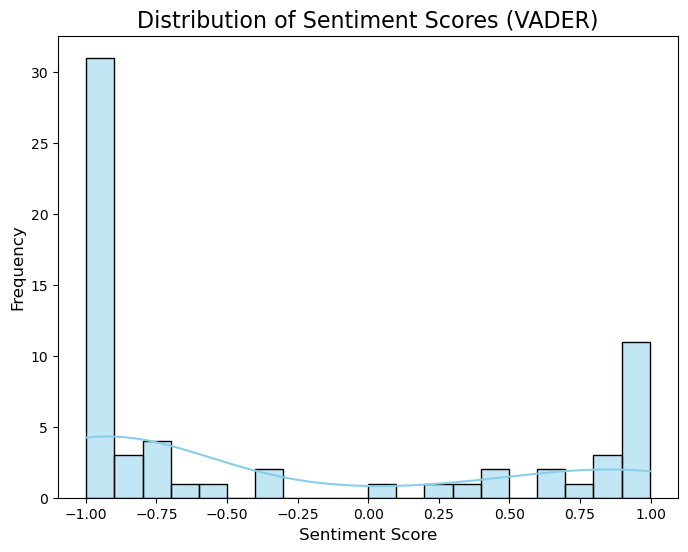

In [9]:
# Histogram to visualize the sentiment scores (vader_score)
plt.figure(figsize=(8, 6))
sns.histplot(df['vader_score'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentiment Scores (VADER)", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

## textblob

In [11]:
df['textblob_polarity'] = df['cleaned_content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize based on polarity score
df['textblob_category'] = df['textblob_polarity'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Display the first two rows
df.head(2)

,title,url,content,cleaned_content,vader_score,vader_category,textblob_polarity,textblob_category
0,Clothes brand gets 100 complaints a day that m...,https://www.bbc.com/news/articles/cx2xjd41g33o,The boss of online clothing brand Snag has tol...,bos onlin cloth brand snag told bbc get compla...,-0.9947,Negative,-0.117077,Negative
1,NewsNews,https://www.bbc.com/news/politics,Many usually loyal Labour MPs had voiced stron...,mani usual loyal labour mp voic strong opposit...,-0.7845,Negative,0.119172,Positive


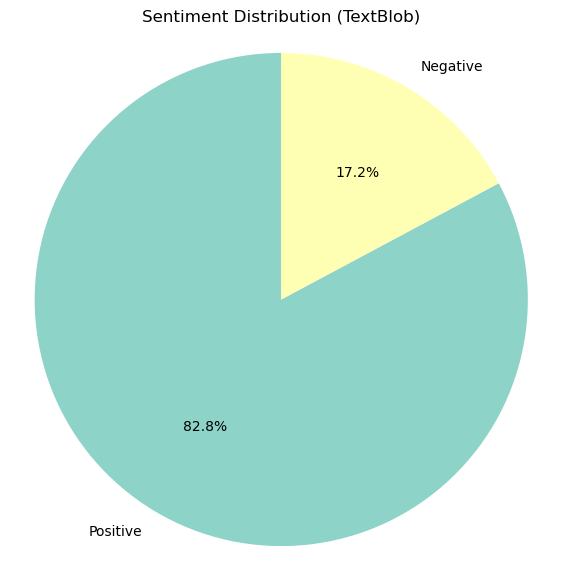

In [12]:
# Pie chart to visualize the distribution of sentiment categories
sentiment_counts = df['textblob_category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(sentiment_counts)))
plt.title("Sentiment Distribution (TextBlob)")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

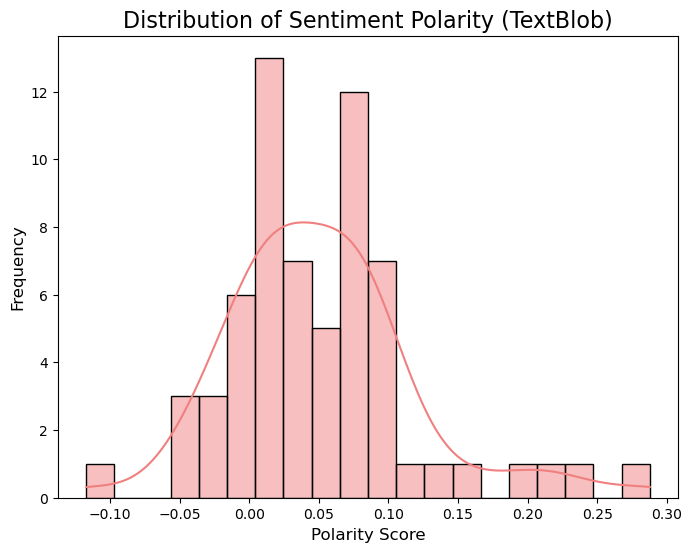

In [13]:
# Histogram to visualize the sentiment polarity scores
plt.figure(figsize=(8, 6))
sns.histplot(df['textblob_polarity'], bins=20, kde=True, color='lightcoral', edgecolor='black')
plt.title("Distribution of Sentiment Polarity (TextBlob)", fontsize=16)
plt.xlabel("Polarity Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

## Afinn

In [15]:
afinn = Afinn()

# Apply Afinn sentiment scoring to the 'cleaned_content' column
df['afinn_score'] = df['cleaned_content'].apply(lambda x: afinn.score(x))

# Categorize the sentiment based on the score
df['afinn_category'] = df['afinn_score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Display the first two rows of the DataFrame
df.head(2)

,title,url,content,cleaned_content,vader_score,vader_category,textblob_polarity,textblob_category,afinn_score,afinn_category
0,Clothes brand gets 100 complaints a day that m...,https://www.bbc.com/news/articles/cx2xjd41g33o,The boss of online clothing brand Snag has tol...,bos onlin cloth brand snag told bbc get compla...,-0.9947,Negative,-0.117077,Negative,-26.0,Negative
1,NewsNews,https://www.bbc.com/news/politics,Many usually loyal Labour MPs had voiced stron...,mani usual loyal labour mp voic strong opposit...,-0.7845,Negative,0.119172,Positive,-4.0,Negative


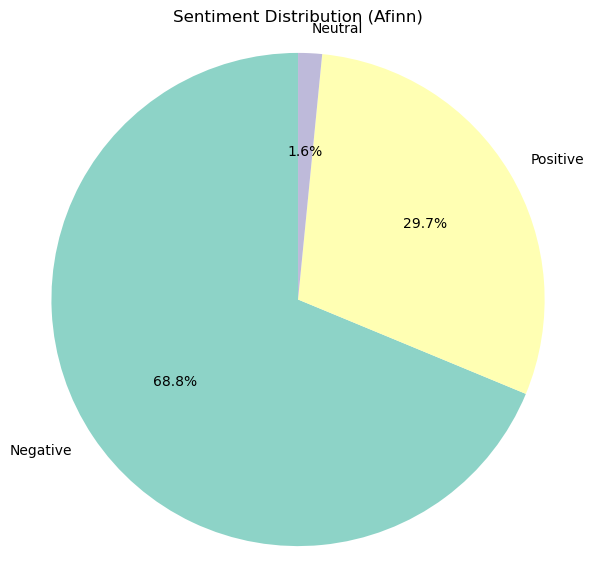

In [16]:
# Pie chart to visualize the distribution of sentiment categories
sentiment_counts = df['afinn_category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(sentiment_counts)))
plt.title("Sentiment Distribution (Afinn)")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

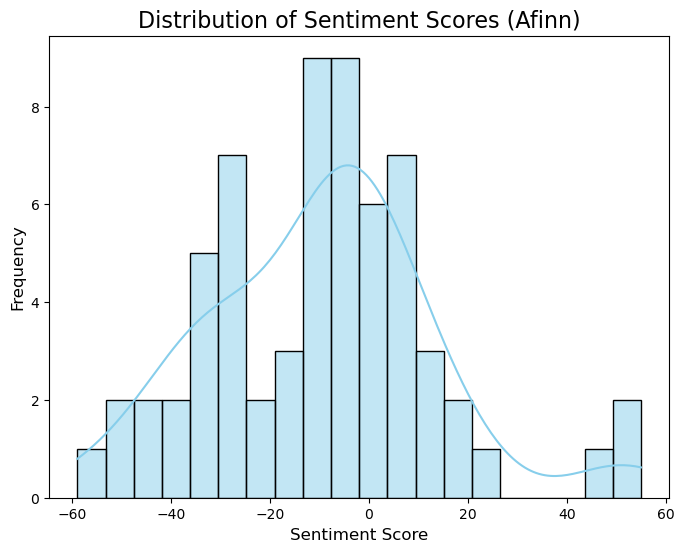

In [17]:
# Histogram to visualize the sentiment scores (afinn_score)
plt.figure(figsize=(8, 6))
sns.histplot(df['afinn_score'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentiment Scores (Afinn)", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

## CountVectorizer and TfidfVectorizer

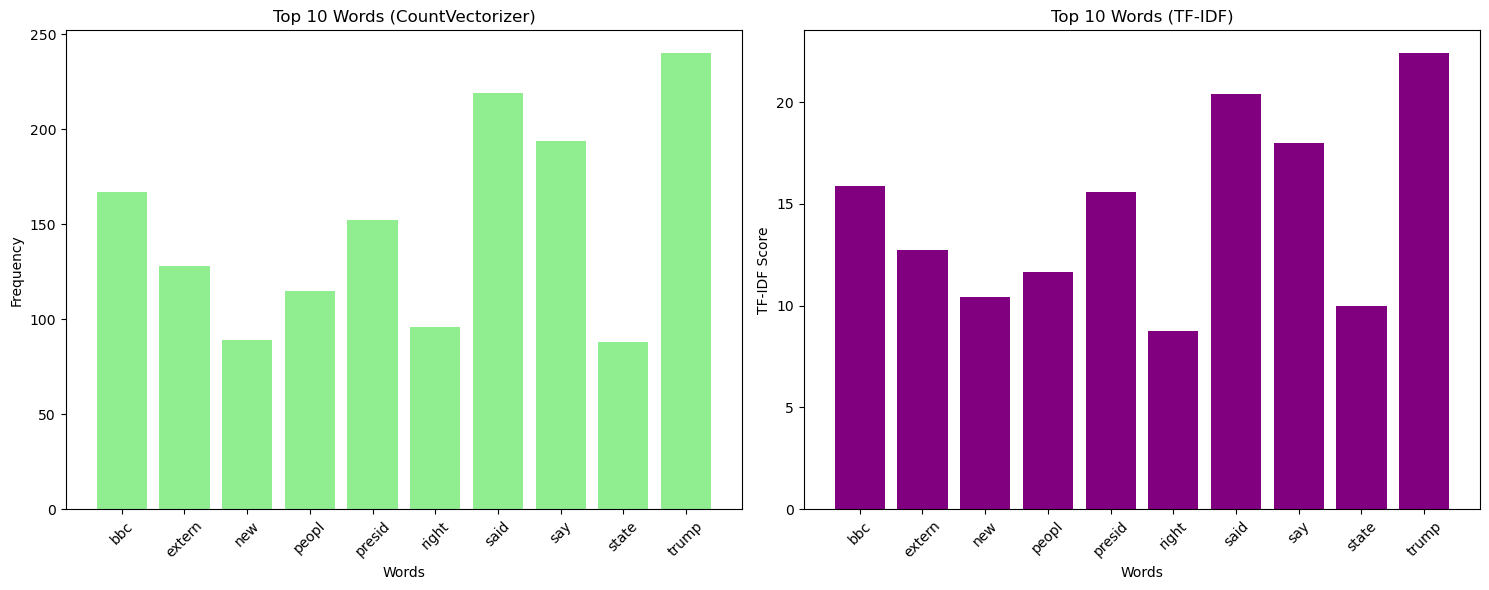

In [19]:
def plot_top_words(df, column_name, max_features=10):
    # Initialize vectorizers
    count_vectorizer = CountVectorizer(max_features=max_features)
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
    
    # Transform the text data
    count_matrix = count_vectorizer.fit_transform(df[column_name])
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[column_name])

    # Create subplots for visualizations
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # CountVectorizer Plot
    count_word_freq = count_matrix.toarray().sum(axis=0)
    axes[0].bar(count_vectorizer.get_feature_names_out(), count_word_freq, color='lightgreen')
    axes[0].set_title(f"Top {max_features} Words (CountVectorizer)")
    axes[0].set_xlabel("Words")
    axes[0].set_ylabel("Frequency")
    axes[0].tick_params(axis='x', rotation=45)

    # TfidfVectorizer Plot
    tfidf_scores = tfidf_matrix.toarray().sum(axis=0)
    axes[1].bar(tfidf_vectorizer.get_feature_names_out(), tfidf_scores, color='purple')
    axes[1].set_title(f"Top {max_features} Words (TF-IDF)")
    axes[1].set_xlabel("Words")
    axes[1].set_ylabel("TF-IDF Score")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame and the column containing text data
plot_top_words(df, 'cleaned_content', max_features=10)

## Summary

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from summa import summarizer
from textblob import TextBlob

def clean_text(text):
    # Implement basic text cleaning (e.g., removing special characters, lowercase, etc.)
    return text.lower()

df['cleaned_content'] = df['content'].apply(clean_text)

# Extractive Summarization using Summa
df['summary'] = df['cleaned_content'].apply(lambda x: summarizer.summarize(x, ratio=0.1))

# Calculate TF-IDF Scores for Topic Relevance
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_content'])

# Apply LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tfidf_matrix)

# Calculate Importance Score based on Topic Relevance (Example: Sum of TF-IDF scores of key words)
df['importance_score'] = df['cleaned_content'].apply(lambda x: sum([tfidf_matrix[0, idx] for idx in vectorizer.transform([x]).indices]))

# Sentiment Analysis for Emotional Relevance
df['sentiment_score'] = df['cleaned_content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Normalize Importance Score
df['normalized_importance'] = (df['importance_score'] - df['importance_score'].min()) / (df['importance_score'].max() - df['importance_score'].min())

# Display Summary and Importance Score for each page
df[['summary', 'importance_score', 'normalized_importance']].head()

,summary,importance_score,normalized_importance
0,catherine thom read the bbc report about the n...,12.917163,1.000000
1,many usually loyal labour mps had voiced stron...,0.763378,0.030312
2,greenland's leading political parties have iss...,0.804307,0.033577
3,"the report said ""social play is a key part of ...",1.704759,0.105420
4,the uk was once ranked the best country for en...,0.712074,0.026218


In [22]:
df.head(5)

,title,url,content,cleaned_content,vader_score,vader_category,textblob_polarity,textblob_category,afinn_score,afinn_category,summary,importance_score,sentiment_score,normalized_importance
0,Clothes brand gets 100 complaints a day that m...,https://www.bbc.com/news/articles/cx2xjd41g33o,The boss of online clothing brand Snag has tol...,the boss of online clothing brand snag has tol...,-0.9947,Negative,-0.117077,Negative,-26.0,Negative,catherine thom read the bbc report about the n...,12.917163,-0.047591,1.000000
1,NewsNews,https://www.bbc.com/news/politics,Many usually loyal Labour MPs had voiced stron...,many usually loyal labour mps had voiced stron...,-0.7845,Negative,0.119172,Positive,-4.0,Negative,many usually loyal labour mps had voiced stron...,0.763378,0.071196,0.030312
2,Greenland's politicians unite against Trump,https://www.bbc.com/news/articles/c2ljrjeqzq4o,Greenland's leading political parties have iss...,greenland's leading political parties have iss...,-0.3455,Negative,0.025390,Positive,-7.0,Negative,greenland's leading political parties have iss...,0.804307,-0.003939,0.033577
3,It's not a competition! The collaborative vide...,https://www.bbc.com/news/articles/c2ljgp4v48no,"Think of video games, and you'll probably thin...","think of video games, and you'll probably thin...",0.9976,Positive,0.032144,Positive,49.0,Positive,"the report said ""social play is a key part of ...",1.704759,0.093518,0.105420
4,NewsNews,https://www.bbc.com/news/bbcindepth,The president once derided attempts to develop...,the president once derided attempts to develop...,0.6486,Positive,0.044409,Positive,3.0,Positive,the uk was once ranked the best country for en...,0.712074,0.031049,0.026218


### Conclusion

In summary, **VADER**, **TextBlob**, **LDA**, **Afinn**, and **Summa** each provide distinct advantages for analyzing and summarizing text:

- **VADER** and **TextBlob** excel in sentiment analysis, with VADER being ideal for informal text and TextBlob offering more generalized polarity and subjectivity scores.
- **Afinn** is a lightweight option for quick sentiment analysis based on individual word sentiment scores.
- **LDA** helps uncover latent topics in large datasets, making it useful for topic modeling and categorization.
- **Summa** provides efficient extractive summarization, selecting key sentences to represent the main content.

These tools are invaluable for gaining insights from text data, whether for sentiment analysis, topic discovery, or summarizing large documents, and are widely applied across various industries.
